In [1]:
import numpy as np
from scipy.stats import binom, beta

def binom_interval(success, total, confint=0.95, alternative="two.sided"):
    if alternative=="less":
      quantile = (1 - confint)
      lower = 0
      upper = beta.ppf(1 - quantile, success + 1, total - success)
      return (lower, upper)
    elif alternative=="greater":
      quantile = (1 - confint)
      lower = beta.ppf(quantile, success, total - success + 1)
      upper = 1
      return (lower, upper)
    else:
      quantile = (1 - confint) / 2.
      lower = beta.ppf(quantile, success, total - success + 1)
      upper = beta.ppf(1 - quantile, success + 1, total - success)
      return (lower, upper)
    
    
    

p = 0.3 
x = binom.rvs(size=20, n=50, p=p)
truth = np.ones(20)
for i in range(20):
   test = binom_interval(x[i], 50)
   truth[i] = (p >= test[0] and p<=test[1])

np.sum(truth)

20.0

In [46]:
x = binom.rvs(n=50,p=p)
binom_interval(x,50)

(0.2640783950945368, 0.5482059715208196)

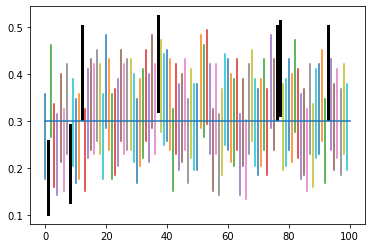

In [10]:
import matplotlib.pyplot as plt
size = 100
p = 0.3 
x = binom.rvs(size=size, n=100, p=p)

for i in range(size):
   test = binom_interval(x[i], 100)
   plt.plot([i,i],[test[0], test[1]])
   if (test[0]<= p <= test[1])==False:
        plt.plot([i,i],[test[0], test[1]], c="black",linewidth=3)
        
plt.plot([0,size],[.3,.3]);